# Predicting mental health treatment need using machine learning
A classification model that predicts whether a person is likely to seek or need mental health treatment, based on survey responses. The insights can help organizations or clinics identify high-risk groups and encourage early intervention. 

This project will be a full data pipeline (cleaning → EDA → feature engineering → modeling → evaluation).

## 1. Problem definition

Statement
> Given information about an employee's demographics, workplace conditions, and personal mental health history, can we predict whether they are likely to seek treatment?

## 2. Data

The data is a structured (CSV) and static data from Kaggle - https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

## 3. Success Criteria

> A model with ≥ 85% accuracy and ≥ 80% recall for the positive class (that is, people who seek treatment) will be considered successful.

## 4. Features
This shows different information about each of the features in the data.

1. Timestamp
2. Age
3. Gender
4. Country
5. state: If you live in the United States, which state or territory do you live in?
6. self_employed: Are you self-employed?
7. family_history: Do you have a family history of mental illness?
8. treatment: Have you sought treatment for a mental health condition? (This will be our target variable)
9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
10. no_employees: How many employees does your company or organization have?
11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?
12. tech_company: Is your employer primarily a tech company/organization?
13. benefits: Does your employer provide mental health benefits?
14. care_options: Do you know the options for mental health care your employer provides?
15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
18. leave: How easy is it for you to take medical leave for a mental health condition?
19. mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
22. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
23. mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
24. phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
25. mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
26. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
27. comments: Any additional notes or comments

### Preparing the tools

I will be using pandas, Matplotlib and NumPy for data analysis and manipulation, and SKLearn for the model

In [134]:
# Import all the tools I need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, accuracy_score

### 4.0. Load and explore the data

**Load the data**

In [66]:
df = pd.read_csv("data/mental-health-in-tech-survey.csv")

**Preview and inspect**

In [67]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [69]:
df.shape

(1259, 27)

In [70]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [71]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### 4.1 Data Cleaning

In [72]:
# Make a copy
df_tmp = df.copy()
df_tmp.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [73]:
# Drop irrelevant/redundant columns - Timestamp and state
df_tmp.drop(columns=["Timestamp", "state"], inplace=True)

In [74]:
# Standardize column names
df_tmp.columns = df_tmp.columns.str.lower().str.replace(" ", "_")

In [75]:
df_tmp.isnull().sum()

age                             0
gender                          0
country                         0
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [76]:
# Drop columns with many missing data - comments
df_tmp.drop(columns=["comments"], inplace=True)

In [77]:
# Impute work_interfere with 'Not specified'
df_tmp["work_interfere"] = df_tmp["work_interfere"].fillna("Not specified")

# Impute self_employed with 'No'
df_tmp["self_employed"] = df_tmp["self_employed"].fillna("No")

In [78]:
# Clean the Age column - remove outliers
df_tmp = df_tmp[(df_tmp["age"] > 17) & (df_tmp["age"] < 75)]

In [79]:
# Normalize gender values
def clean_gender(g):
    g = str(g).strip().lower()
    if g in ["male", "m", "man", "male-ish", "maile", "malr", "mal", "msle", "cis male", "cis man", "make", "mail", "guy (-ish) ^_^", "male (cis)", "ostensibly male, unsure what that really means", "something kinda male?"]:
        return "Male"
    elif g in ["female", "f", "woman", "cis female", "cis-female/femme", "female (cis)", "femake", "femail", "trans-female", "female (trans)", "trans woman"]:
        return "Female"
    else:
        return "Other"

df_tmp.loc[:, "gender"] = df_tmp["gender"].apply(clean_gender)

In [80]:
for col in df_tmp.select_dtypes(include="object").columns:
    print(f"{col}: {df_tmp[col].unique()}\n")

gender: ['Female' 'Male' 'Other']

country: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']

self_employed: ['No' 'Yes']

family_history: ['No' 'Yes']

treatment: ['Yes' 'No']

work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' 'Not specified']

no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

remote_work: ['No' 'Yes']

tech_company: ['Yes' 'No']

benefits: ['Yes' "Don't know" 'No']

care_options: ['Not sure' 'No' 'Yes']

wellness_program: ['No' "Don't know" 'Yes']

seek_help: ['Yes' "Don't know"

### 4.2. Exploratory Data Analysis (EDA)

In [81]:
# Count each set of the target variable
df_tmp["treatment"].value_counts()

treatment
Yes    632
No     619
Name: count, dtype: int64

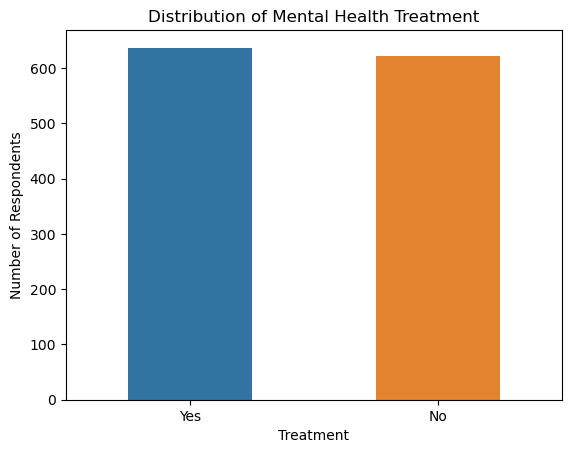

In [82]:
# Distribution of the target
df["treatment"].value_counts().plot(kind="bar", color=["#3274a1", "#e48128fa"])
plt.title("Distribution of Mental Health Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.show()

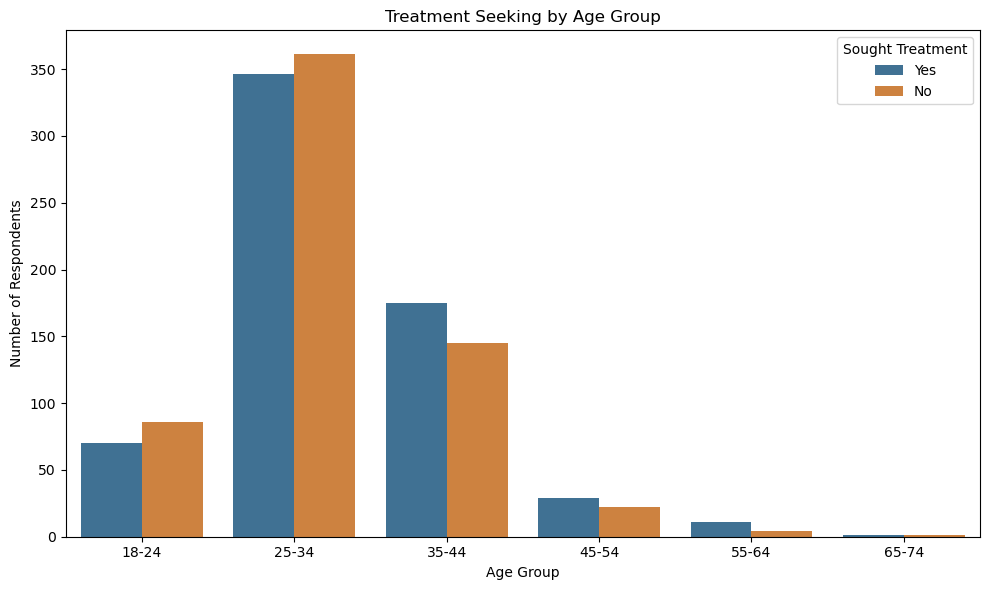

In [83]:
# Create Age groups
bins = [17, 24, 34, 44, 54, 64, 74]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74"]
df_tmp["age_group"] = pd.cut(df_tmp["age"], bins=bins, labels=labels)

# Custom palette
custom_palette = {
    "Yes": "#3274a1",
    "No": "#e48128fa"
}

# Plot Age vs. treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tmp, x="age_group", hue="treatment", palette=custom_palette)
plt.title("Treatment Seeking by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.legend(title="Sought Treatment")
plt.tight_layout()
plt.show()

In [84]:
df_tmp.gender.value_counts()

gender
Male      989
Female    251
Other      11
Name: count, dtype: int64

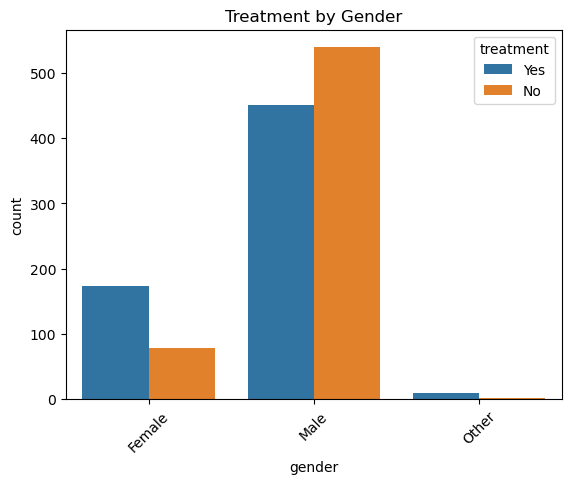

In [85]:
sns.countplot(data=df_tmp, x='gender', hue='treatment')
plt.title('Treatment by Gender')
plt.xticks(rotation=45)
plt.show()

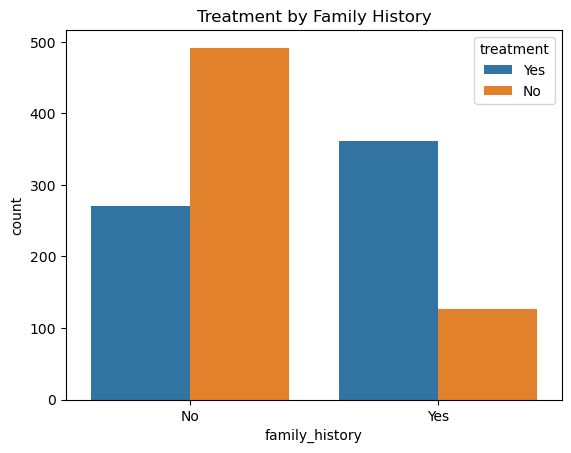

In [86]:
sns.countplot(data=df_tmp, x='family_history', hue='treatment')
plt.title('Treatment by Family History')
plt.show()

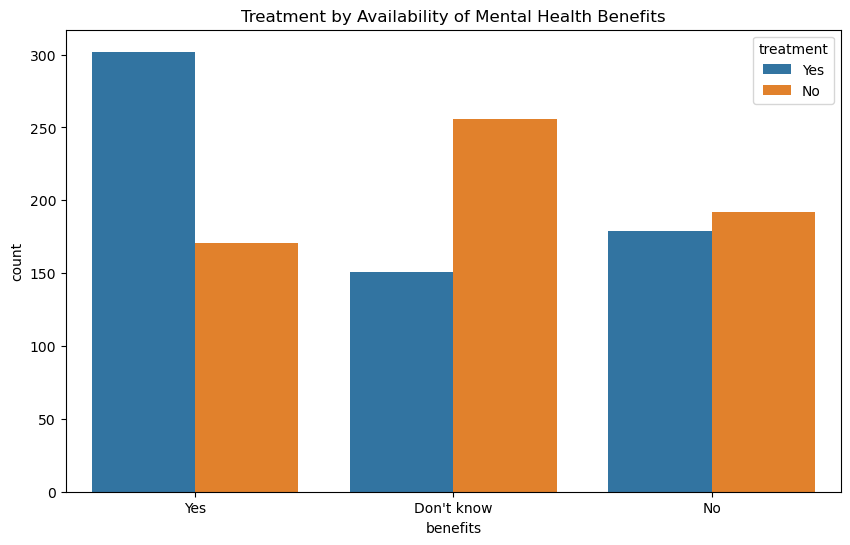

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tmp, x='benefits', hue='treatment')
plt.title('Treatment by Availability of Mental Health Benefits')
plt.show()

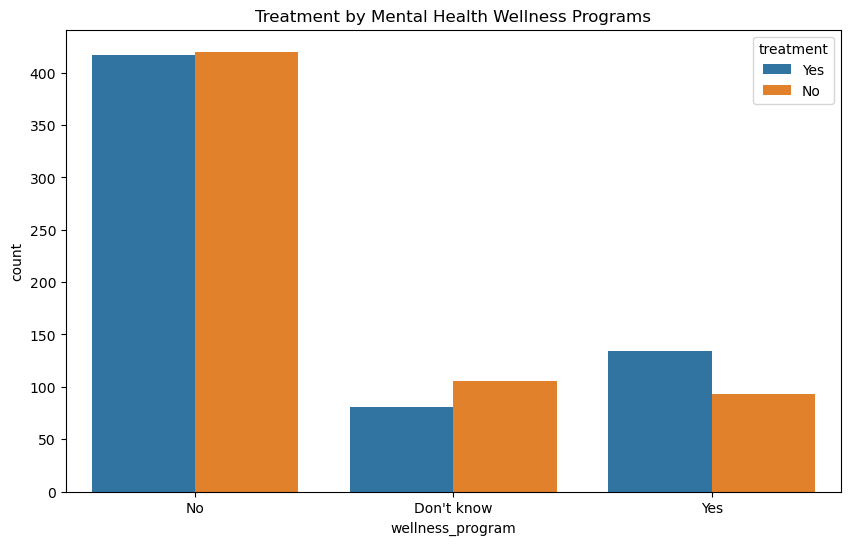

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tmp, x='wellness_program', hue='treatment')
plt.title('Treatment by Mental Health Wellness Programs')
plt.show()

### 4.3. Feature Encoding

In [89]:
# Ordered categories - Ordinal Encoding
work_interfere_map = {
    "Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Not specified": -1
}
df_tmp["work_interfere"] = df_tmp["work_interfere"].map(work_interfere_map)

no_employees_map = {
    "1-5": 0, "6-25": 1, "26-100": 2, "100-500": 3, "500-1000": 4, "More than 1000": 5
}
df_tmp["no_employees"] = df_tmp["no_employees"].map(no_employees_map)

leave_map = {
    "Very easy": 0, "Somewhat easy": 1, "Don't know": 2,
    "Somewhat difficult": 3, "Very difficult": 4
}
df_tmp["leave"] = df_tmp["leave"].map(leave_map)

In [90]:
# High-cardinality categories (e.g. country) - label encoding
df_tmp["country"] = pd.Categorical(df_tmp["country"]).codes

In [91]:
# Map Yes/No or similar to 1/0 - Binary Encoding
binary_cols = [col for col in df_tmp.columns if df_tmp[col].nunique() == 2]
for col in binary_cols:
    df_tmp[col] = df_tmp[col].map({"Yes": 1, "No": 0})

In [92]:
# For Small nominal categories - one-hot encoding
one_hot_cols = [
    "gender",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_health_interview",
    "phys_health_interview",
    "mental_vs_physical",
    "benefits"
]
df_tmp = pd.get_dummies(df_tmp, columns=one_hot_cols, drop_first=True)

In [93]:
# Drop age_group and use age
df_tmp.drop(columns=["age_group"], inplace=True)

## 5. Modelling

We will train a `RandomForestClassifier` in stages, starting with the default model, then progressively tuning it to optimize performance.

### 5.1. Default Random Forest

In [111]:
np.random.seed(42)

# Split data into X and y
X = df_tmp.drop(["treatment"], axis=1)
y = df_tmp["treatment"]

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Default model
rf_default_model = RandomForestClassifier()

# Fit the model to the training datasets
rf_default_model.fit(X_train, y_train)

# compare the model
rf_default_model_score = rf_default_model.score(X_test, y_test)
print("Default RandomForestClassifier Accuracy: ", rf_default_model_score)

Default RandomForestClassifier Accuracy:  0.8207171314741036


### 5.2. Manually Tuned Random Forest

In [112]:
np.random.seed(42)

# Keep track of best score
rf_mt_best_score = 0
rf_mt_best_params = {}

# Parameters
n_estimators_list=[50, 100, 200]
max_depth_list=[None, 5, 10]
min_samples_split_list=[2, 5, 10]
min_samples_leaf_list=[2, 5, 10]
max_features_list=["sqrt", "log2", None]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            for min_samples_leaf in min_samples_leaf_list:
                for max_features in max_features_list:
                    try:
                        rf_mt_model = RandomForestClassifier(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            max_features=max_features,
                            random_state=42
                        )
                        rf_mt_model.fit(X_train, y_train)
                        preds = rf_mt_model.predict(X_test)
                        score = accuracy_score(y_test, preds)
                            
                        if score > rf_mt_best_score:
                            rf_mt_best_score = score
                            rf_mt_best_params = {
                                "n_estimators": n_estimators,
                                "max_depth": max_depth,
                                "min_samples_split": min_samples_split,
                                "max_features": max_features
                            }
                    except Exception as e:
                        print(f"Skipping params due to error: {e}")

print("Manually Tuned RandomForestClassifier Best params:", rf_mt_best_params)
print("Manually Tuned RandomForestClassifier Accuracy:", rf_mt_best_score)

Manually Tuned RandomForestClassifier Best params: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'max_features': 'sqrt'}
Manually Tuned RandomForestClassifier Accuracy: 0.8247011952191236


### 5.3. Tuned with RandomizedSearchCV

In [113]:
np.random.seed(42)

rf_param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

rf_rs_model = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(
    estimator=rf_rs_model,
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)
rf_random_search.fit(X_train, y_train)

y_pred = rf_random_search.best_estimator_.predict(X_test)
rf_rs_best_score = accuracy_score(y_test, y_pred)

print("RandomizedSearchCV Tuned RandomForestClassifier Best Params:", rf_random_search.best_params_)
print("RandomizedSearchCV Tuned RandomForestClassifier Best Accuracy:", rf_rs_best_score)

RandomizedSearchCV Tuned RandomForestClassifier Best Params: {'n_estimators': 50, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 30}
RandomizedSearchCV Tuned RandomForestClassifier Best Accuracy: 0.8127490039840638


### 5.4. Tuned with GridSearchCV

In [114]:
np.random.seed(42)

gs_param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"]
}

rf_gs_model = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(
    estimator=rf_gs_model,
    param_grid=gs_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train, y_train)

y_pred = rf_grid_search.best_estimator_.predict(X_test)
rf_gs_best_score = accuracy_score(y_test, y_pred)

print("GridSearchCV Tuned RandomForestClassifier Best Params:", rf_grid_search.best_params_)
print("GridSearchCV Tuned RandomForestClassifier Best Accuracy:", rf_gs_best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV Tuned RandomForestClassifier Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}
GridSearchCV Tuned RandomForestClassifier Best Accuracy: 0.8167330677290837


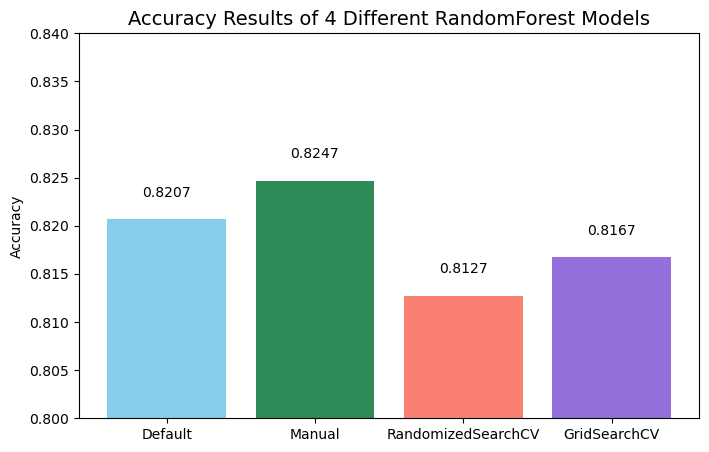

In [149]:
# Visualize results

models = ["Default", "Manual", "RandomizedSearchCV", "GridSearchCV"]
accuracies = [rf_default_model_score, rf_mt_best_score, rf_rs_best_score, rf_gs_best_score]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'seagreen', 'salmon', 'mediumpurple'])

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.002, f"{height:.4f}", 
             ha="center", va="bottom", fontsize=10)

plt.title("Accuracy Results of 4 Different RandomForest Models", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.8, 0.84)

# Save the plot to a file
plt.savefig("images/models-results.png", dpi=300, bbox_inches='tight')
plt.show()

## 6. Model Evaluation

In [150]:
# Evaluation code template
from IPython.display import display, Markdown

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    display(Markdown(f"### 📌 **{model_name}**"))
    print("Accuracy:", acc)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC Curve
    if len(set(y_test)) == 2:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        print("ROC AUC Score:", auc_score)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} - ROC Curve")
        plt.legend()
        plt.show()

### 📌 **Default RF**

Accuracy: 0.8207171314741036

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       113
           1       0.82      0.86      0.84       138

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251



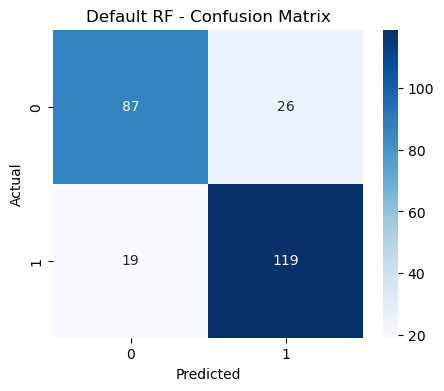

ROC AUC Score: 0.8643388482749776


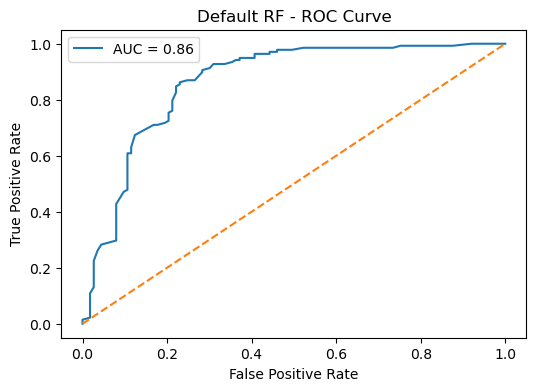

In [145]:
evaluate_model(rf_default_model, X_test, y_test, "Default RF")

### 📌 **Manual Tuned RF**

Accuracy: 0.796812749003984

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       113
           1       0.80      0.85      0.82       138

    accuracy                           0.80       251
   macro avg       0.80      0.79      0.79       251
weighted avg       0.80      0.80      0.80       251



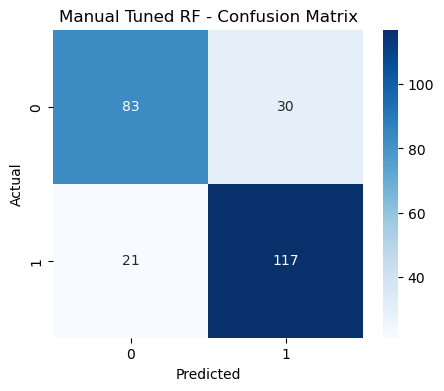

ROC AUC Score: 0.8461908426317815


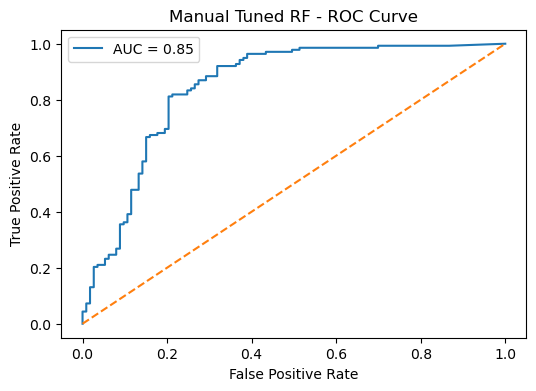

In [146]:
evaluate_model(rf_mt_model, X_test, y_test, "Manual Tuned RF")

### 📌 **RandomizedSearchCV RF**

Accuracy: 0.8127490039840638

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       113
           1       0.80      0.88      0.84       138

    accuracy                           0.81       251
   macro avg       0.82      0.80      0.81       251
weighted avg       0.82      0.81      0.81       251



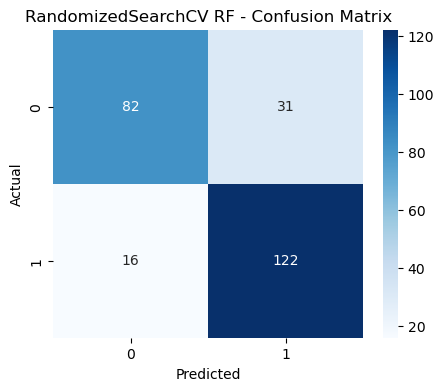

ROC AUC Score: 0.8624470950365526


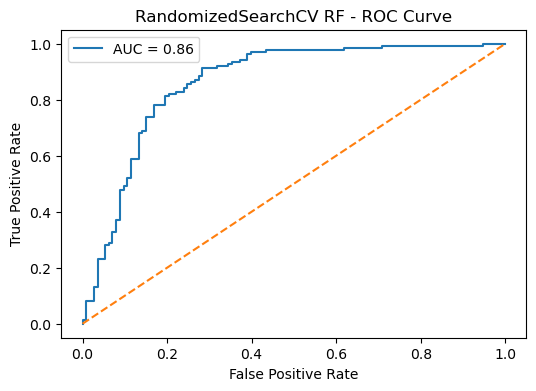

In [147]:
evaluate_model(rf_random_search.best_estimator_, X_test, y_test, "RandomizedSearchCV RF")

### 📌 **GridSearchCV RF**

Accuracy: 0.8167330677290837

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       113
           1       0.82      0.86      0.84       138

    accuracy                           0.82       251
   macro avg       0.82      0.81      0.81       251
weighted avg       0.82      0.82      0.82       251



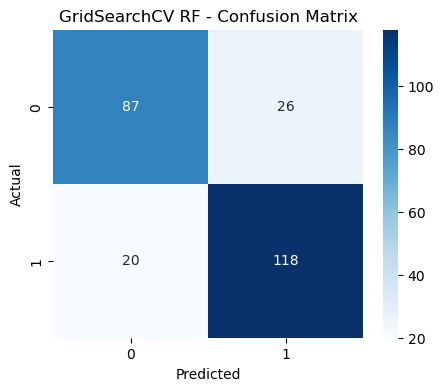

ROC AUC Score: 0.8601385148133898


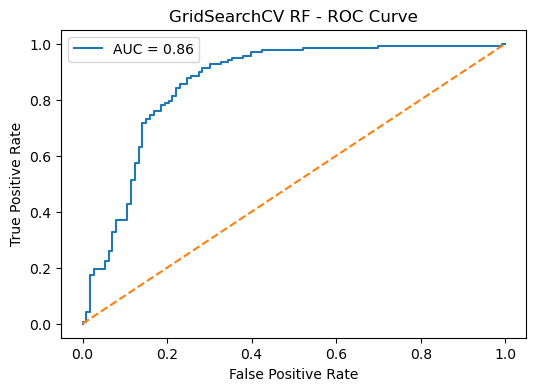

In [148]:
evaluate_model(rf_grid_search.best_estimator_, X_test, y_test, "GridSearchCV RF")